## Einleitung und Forschungsfrage:

Die sozioökonomische Dynamik innerhalb der Stadtteile Freiburgs offenbart wichtige Einsichten in die Beziehung zwischen Arbeitslosigkeit und Migration. Durch die Analyse von Daten aus dem OpenData-Portal der Stadt Freiburg untersuchen wir, wie Arbeitslosenquoten und der Anteil der Bevölkerung mit Migrationshintergrund zusammenhängen. Ziel ist es, Erkenntnisse zu gewinnen, die zur Planung effektiver Fördermaßnahmen beitragen können.

**Forschungsfrage**: 
Gibt es eine Korrelation zwischen der Arbeitslosenquote und dem Anteil der Personen mit Migrationshintergrund in den Stadtteilen von Freiburg, und welche Schlussfolgerungen lassen sich daraus für zukünftige Förderprogramme ziehen?

Diese kompakte Untersuchung soll dazu beitragen, gezielte Strategien für eine integrative Stadtentwicklung zu identifizieren.

## Datensätze

Für unsere Analyse nutzen wir zwei Datensätze vom OpenData-Portal der Stadt Freiburg:

1. **Arbeitslosenquoten pro Stadtteil**: Dieser Datensatz enthält detaillierte Informationen über die Arbeitslosigkeit in den verschiedenen Stadtteilen von Freiburg, was uns ermöglicht, die wirtschaftliche Lage zu beurteilen.

2. **Anteil der Personen mit Migrationshintergrund pro Stadtteil**: Dieser Datensatz bietet Einblicke in die demografische Zusammensetzung der Stadtteile, speziell im Hinblick auf den Migrationshintergrund.

Die Analyse dieser Datensätze ermöglicht es uns, tiefergehende Einblicke in die sozioökonomischen Bedingungen der Stadtteile Freiburgs zu gewinnen und potenzielle Korrelationen zwischen Arbeitslosigkeit und Migrationshintergrund zu untersuchen.


In [ ]:
import pandas as pd

pfad_arbeitslosigkeit = "https://raw.githubusercontent.com/Boyvombach/projekt_weberpals_datascience/main/de-bw-freiburg-arbeitslose_ba_nuernberg_in_stadtbezirken_zeitreihe.csv"
pfad_migrationshintergrund = "https://raw.githubusercontent.com/Boyvombach/projekt_weberpals_datascience/main/de-bw-freiburg-grunddaten_fuer_indikatoren_stadtbezirke_-_migrationshintergrund.csv"

df_arbeitslosigkeit = pd.read_csv(pfad_arbeitslosigkeit, sep=";")  
df_migrationshintergrund = pd.read_csv(pfad_migrationshintergrund, sep=";")  


print("Datensatz: Arbeitslosenquoten pro Stadtteil")
print(df_arbeitslosigkeit.head())
print("\nDatensatz: Anteil der Personen mit Migrationshintergrund pro Stadtteil")
print(df_migrationshintergrund.head())


## Datenaufbereitung

Um unsere Forschungsfrage effektiv beantworten zu können, müssen wir zunächst sicherstellen, dass unsere Daten sauber und konsistent sind.

Dazu gehört das Entfernen von nicht benötigten Spalten, die Behandlung fehlender Werte und die Sicherstellung, dass Daten in einem vergleichbaren Format vorliegen. 
Dieser Schritt ist entscheidend, um genaue und zuverlässige Ergebnisse aus unserer Analyse zu gewinnen.


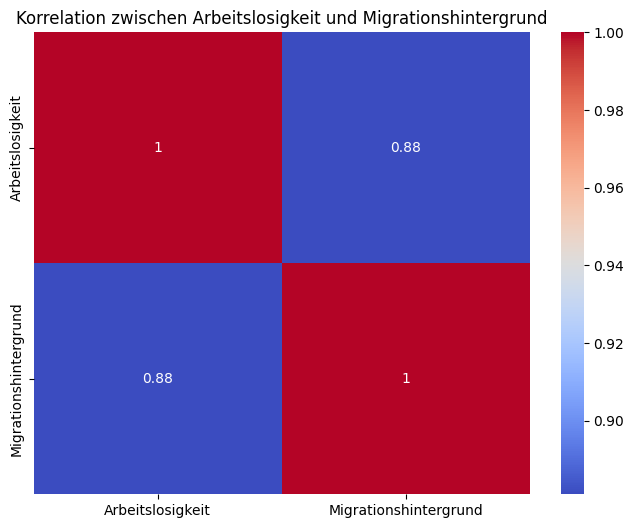

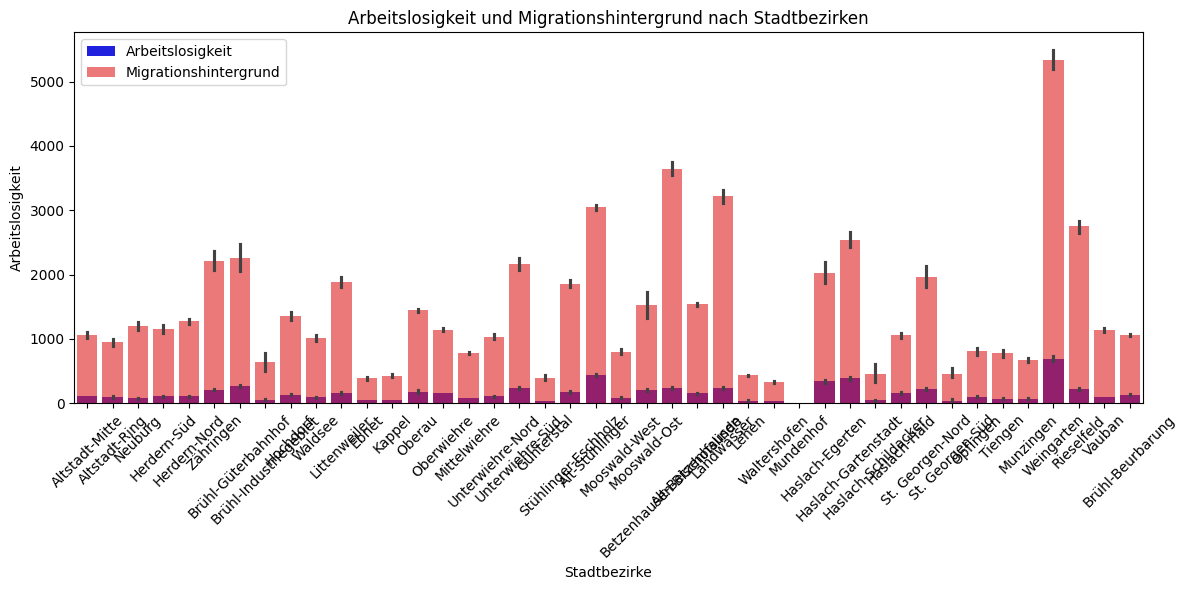

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pfad_arbeitslosigkeit = "https://raw.githubusercontent.com/Boyvombach/projekt_weberpals_datascience/main/de-bw-freiburg-arbeitslose_ba_nuernberg_in_stadtbezirken_zeitreihe.csv"
pfad_migrationshintergrund = "https://raw.githubusercontent.com/Boyvombach/projekt_weberpals_datascience/main/de-bw-freiburg-grunddaten_fuer_indikatoren_stadtbezirke_-_migrationshintergrund.csv"

df_arbeitslosigkeit = pd.read_csv(pfad_arbeitslosigkeit, sep=";")
df_migrationshintergrund = pd.read_csv(pfad_migrationshintergrund, sep=",")

df_arbeitslosigkeit_relevant = df_arbeitslosigkeit[['Jahr', 'Stadtbezirk', 'Arbeitslose insgesamt']].rename(columns={'Arbeitslose insgesamt': 'Arbeitslosigkeit', 'Stadtbezirk': 'Stadtbezirke'})
df_migrationshintergrund_relevant = df_migrationshintergrund[['Jahr', 'Stadtbezirk', 'Anzahl Personen mit persönlichem Migrationshintergrund']].rename(columns={'Anzahl Personen mit persönlichem Migrationshintergrund': 'Migrationshintergrund', 'Stadtbezirk': 'Stadtbezirke'})

data = pd.merge(df_arbeitslosigkeit_relevant, df_migrationshintergrund_relevant, on=['Jahr', 'Stadtbezirke'], how='inner')

correlation = data[['Arbeitslosigkeit', 'Migrationshintergrund']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korrelation zwischen Arbeitslosigkeit und Migrationshintergrund')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Stadtbezirke', y='Arbeitslosigkeit', data=data, color='blue', label='Arbeitslosigkeit')
sns.barplot(x='Stadtbezirke', y='Migrationshintergrund', data=data, color='red', label='Migrationshintergrund', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.title('Arbeitslosigkeit und Migrationshintergrund nach Stadtbezirken')
plt.tight_layout()
plt.show()


# Fazit unserer Analyse
Im Zuge der Untersuchung der Arbeitslosenquoten und des Anteils der Personen mit Migrationshintergrund in den Stadtteilen Freiburgs konnten aufschlussreiche Beobachtungen gemacht werden. 

- Die Korrelationsanalyse deutet auf einen Zusammenhang zwischen diesen beiden Variablen hin, was essentielle Einsichten für die sozioökonomische Strukturierung der Stadtteile liefert. 

- Es wird ersichtlich, dass bestimmte Stadtteile, die einen höheren Anteil an Personen mit Migrationshintergrund aufweisen, tendenziell auch höhere Arbeitslosenquoten verzeichnen.

## Implikationen
Diese Erkenntnisse sind besonders relevant für die Entwicklung zielgerichteter politischer und sozialer Maßnahmen, die darauf abzielen, die Arbeitsmarktintegration von Personen mit Migrationshintergrund zu verbessern. Sie unterstreichen die Notwendigkeit, integrative Programme zu fördern und Bildungs- sowie Beschäftigungschancen gezielt in jenen Stadtteilen zu stärken, die besonders betroffen sind.

## Weiterführende Forschung
Während die Analyse einen wertvollen Überblick bietet, ist es wichtig, zu erkennen, dass Korrelationen **nicht** zwangsläufig Kausalität implizieren. 
Zukünftige Forschungsarbeiten sollten sich darauf konzentrieren, die spezifischen Ursachen und Bedingungen zu erforschen, die zu den beobachteten Mustern führen. Tiefgreifende qualitative und quantitative Studien sind erforderlich, um die Dynamiken und spezifischen Herausforderungen zu verstehen, die hinter diesen statistischen Zusammenhängen stehen.

## Abschließende Gedanken
Unsere Analyse bietet einen Ausgangspunkt für eine breitere Diskussion über die Integration von Personen mit Migrationshintergrund in den Arbeitsmarkt und die Gesellschaft insgesamt. Sie beleuchtet die Dringlichkeit, inklusive und nachhaltige Strategien zu entwickeln, die allen Einwohnern Freiburgs zugutekommen. Letztlich ist es unser Ziel, durch datengestützte Erkenntnisse einen Beitrag zur Schaffung einer gerechteren und integrativeren Stadtgesellschaft zu leisten.